In [23]:
from entsoe import EntsoePandasClient
import pandas as pd
import config
import seaborn as sns

In [24]:
API_KEY = config.API_KEY

In [25]:
print(API_KEY)

af352fcd-6c25-48a8-a82d-dfd77aa08bcd


In [26]:
client = EntsoePandasClient(api_key=API_KEY)

In [27]:
start = pd.Timestamp('20220101', tz='Europe/Brussels')
end = pd.Timestamp('20221231', tz='Europe/Brussels')
country_code = 'ES' 
# country_code_from = 'FR'  
# country_code_to = 'DE_LU' 
type_marketagreement_type = 'A01'
contract_marketagreement_type = "A01"

In [ ]:
prices = client.query_day_ahead_prices(country_code, start=start,end=end)
df_prices = pd.DataFrame({'date':prices.index, 'price':prices.values})
df_prices['date'] = pd.to_datetime(df_prices['date'])
df_prices.to_csv('prices.csv')

In [ ]:
df_prices

<AxesSubplot:xlabel='date', ylabel='price'>

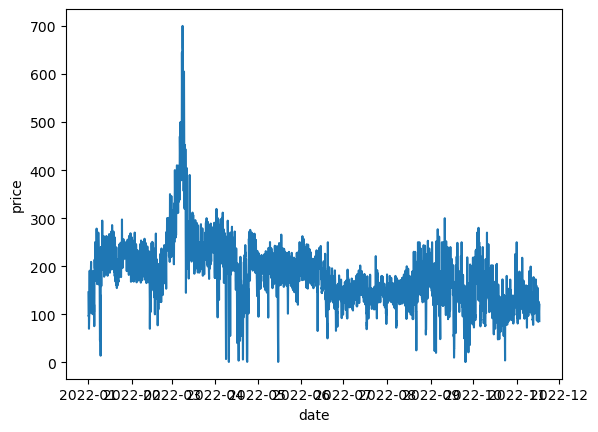

In [28]:
sns.lineplot(data=df_prices, x="date", y="price")

<AxesSubplot:xlabel='df_temp', ylabel='Actual Load'>

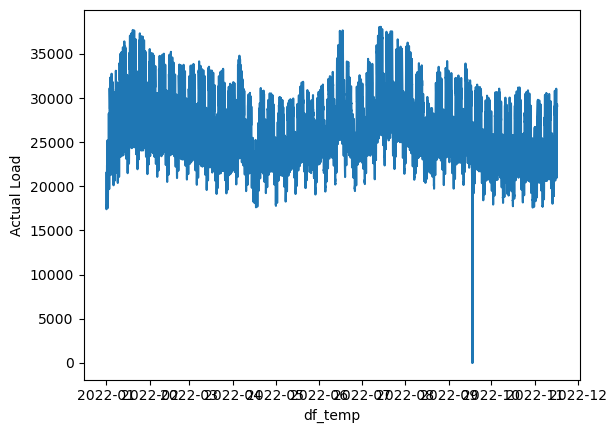

In [29]:
df_temp = client.query_load(country_code, start=start,end=end)
df_temp['df_temp'] = df_temp.index
sns.lineplot(data=df_temp, x="df_temp", y="Actual Load")

In [30]:
df_temp = client.query_wind_and_solar_forecast(country_code, start=start,end=end)
df_temp['df_temp'] = df_temp.index

<AxesSubplot:xlabel='df_temp', ylabel='Solar'>

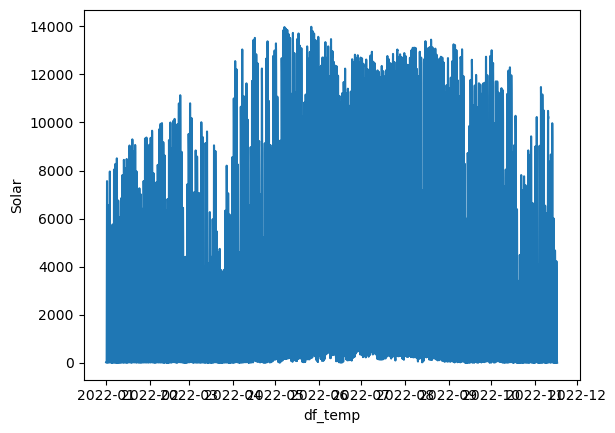

In [31]:
sns.lineplot(data=df_temp, x="df_temp", y="Solar")

<AxesSubplot:xlabel='df_temp', ylabel='Wind Onshore'>

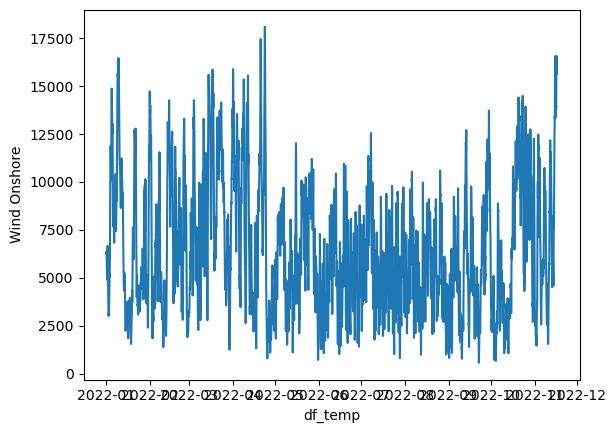

In [32]:
sns.lineplot(data=df_temp, x="df_temp", y="Wind Onshore")

In [33]:
# methods that return Pandas Series
client.query_day_ahead_prices(country_code, start=start,end=end)
client.query_net_position(country_code, start=start, end=end, dayahead=True)
client.query_crossborder_flows(country_code_from, country_code_to, start, end)
client.query_scheduled_exchanges(country_code_from, country_code_to, start, end, dayahead=False)
client.query_net_transfer_capacity_dayahead(country_code_from, country_code_to, start, end)
client.query_net_transfer_capacity_weekahead(country_code_from, country_code_to, start, end)
client.query_net_transfer_capacity_monthahead(country_code_from, country_code_to, start, end)
client.query_net_transfer_capacity_yearahead(country_code_from, country_code_to, start, end)
client.query_intraday_offered_capacity(country_code_from, country_code_to, start, end,implicit=True)
client.query_offered_capacity(country_code_from, country_code_to, start, end, contract_marketagreement_type, implicit=True)
client.query_aggregate_water_reservoirs_and_hydro_storage(country_code, start, end)

# methods that return Pandas DataFrames
client.query_load(country_code, start=start,end=end)
client.query_load_forecast(country_code, start=start,end=end)
client.query_load_and_forecast(country_code, start=start, end=end)
client.query_generation_forecast(country_code, start=start,end=end)
client.query_wind_and_solar_forecast(country_code, start=start,end=end, psr_type=None)
client.query_generation(country_code, start=start,end=end, psr_type=None)
client.query_generation_per_plant(country_code, start=start,end=end, psr_type=None)
client.query_installed_generation_capacity(country_code, start=start,end=end, psr_type=None)
client.query_installed_generation_capacity_per_unit(country_code, start=start,end=end, psr_type=None)
client.query_imbalance_prices(country_code, start=start,end=end, psr_type=None)
client.query_contracted_reserve_prices(country_code, start, end, type_marketagreement_type, psr_type=None)
client.query_contracted_reserve_amount(country_code, start, end, type_marketagreement_type, psr_type=None)
client.query_unavailability_of_generation_units(country_code, start=start,end=end, docstatus=None, periodstartupdate=None, periodendupdate=None)
client.query_unavailability_of_production_units(country_code, start, end, docstatus=None, periodstartupdate=None, periodendupdate=None)
client.query_unavailability_transmission(country_code_from, country_code_to, start, end, docstatus=None, periodstartupdate=None, periodendupdate=None)
client.query_withdrawn_unavailability_of_generation_units(country_code, start, end)
client.query_import(country_code, start, end)
client.query_generation_import(country_code, start, end)
client.query_procured_balancing_capacity(country_code, start, end, process_type, type_marketagreement_type=None)

Exception: Please specify the start and end date explicity with start=<date> when calling this function